In [1]:
# Load packages
import os
import pandas as pd
import numpy as np

# This line is needed to display plots inline in Jupyter Notebook
%matplotlib inline

# Required for basic python plotting functionality
import matplotlib.pyplot as plt

# Required for formatting dates later in the case
import datetime
import matplotlib.dates as mdates

# Required to display image inline
from IPython.display import Image

# Advanced plotting functionality with seaborn
import seaborn as sns

sns.set(style="whitegrid")  # can set style depending on how you'd like it to look

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels
from scipy import stats
from pingouin import pairwise_ttests #this is for performing the pairwise tests
import warnings
warnings.filterwarnings("ignore")  # Suppress all warnings

# Goals section

### Import files - Do not show this in dashboard

In [2]:
#This file will be used to show enrollment basic analysis and revenue basic analysis
#Revenue per student was calculated by dividing total revenue/total enrollment.
df = pd.read_csv('dashboard_total_enrollment.csv', index_col=0)
#We eliminate the office of education and department of education because they don't have students enrolled directly
df = df.loc[df['Agency Name'].apply(lambda x: 'OFFICE OF EDUCATION' not in x)]
df = df.loc[df['Agency Name'].apply(lambda x: 'DEPARTMENT OF EDUCATION' not in x)]


In [3]:
df2 = pd.read_csv('dashboard_final_merged.csv')

In [4]:
df2.shape

(8215, 28)

In [5]:
assDF=pd.read_csv('dashboard_assessment.csv', index_col=0)

In [6]:
df = df[df['Total Enrollment'] != 0]
df = df[df['Total Enrollment'] > 250]

df=df[df['Revenue per student']!= 0] 
df=df[df['Revenue per student'] < 20000]

df_nonLosAngeles = df.drop(493, axis=0)
df_general_districts = df_nonLosAngeles[df_nonLosAngeles['Total Enrollment'] < 10000]
df_large_districts = df_nonLosAngeles[df_nonLosAngeles['Total Enrollment'] > 10000]

**INFO ON LABELING GRAPHS:**

The proper form for a graph title is "y-axis variable vs. x-axis variable."

Give your graph a title. Most likely it will be whatever your variable is compared to whatever your constant is. Examples would be Growth (variable) over Time (constant) or Precipitation (variable) by Month (constant) or Biomass (variable) vs. Average Temperature (Constant). The title is in title case (Capitalizing important words). The title will either be at the top of the graph just below "Figure 1" or just below the label of the X-axis.

https://sciencing.com/proper-way-label-graph-5195234.html

# Diagrams for goals section

###  Revenue per student distribution

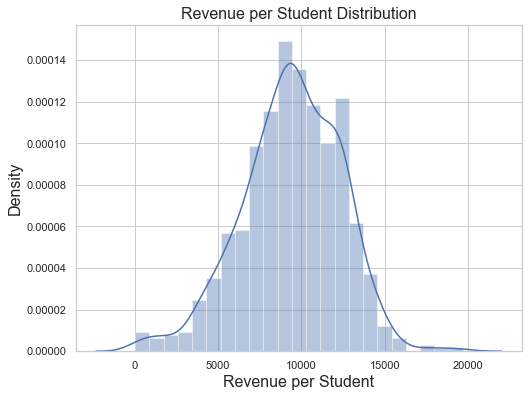

In [7]:
plt.figure(figsize=(8,6))
sns.distplot(df['Revenue per student'])
plt.title('Revenue per Student Distribution', fontsize = 16)

# Adding labels
_ = plt.xlabel('Revenue per Student', fontsize=16)
_ = plt.ylabel('Density', fontsize=16)

plt.show()

### Enrollment per ethnicity in the state of California

In [8]:
DFfinMelt = pd.melt(df, id_vars=['District Code', 'Agency Name', 'Total Enrollment', 'Total Revenue', 'Revenue per student'], 
        value_vars=['Black', 'Hispanic', 'White', 'Asian or Asian/Pacific Islander','American Indian/Alaska Native', 'Hawaiian Nat./Pacific Isl.','Two or More Races'])
DFfinMelt.columns = ['District Code', 'Agency Name', 'Total Enrollment', 'Total Revenue','Revenue per student', 'Subgroup ID', 'Count Enrollment per ethnicity']

In [9]:
pivot_df = DFfinMelt.pivot_table(values='Count Enrollment per ethnicity',index='Subgroup ID', aggfunc=np.sum).reset_index()
pivot_df.columns = ['Ethnicity', 'Total Enrollment']
pivot_df['Percent']= pivot_df['Total Enrollment']/(pivot_df['Total Enrollment'].sum())*100
pivot_df = pivot_df.sort_values(by='Percent')
pivot_df.style.format({'Total Enrollment': "{:,.0f}"})#,'Percent':"{:.0%}"})#,'Percent Not Disadvantaged':"{:.2%}"})

In [10]:
#plt.figure(figsize=(6, 4))
#sns.barplot(y='Total Enrollment',x='Ethnicity',data=pivot_df)
#plt.xticks(rotation=45, ha='right')
#plt.show()

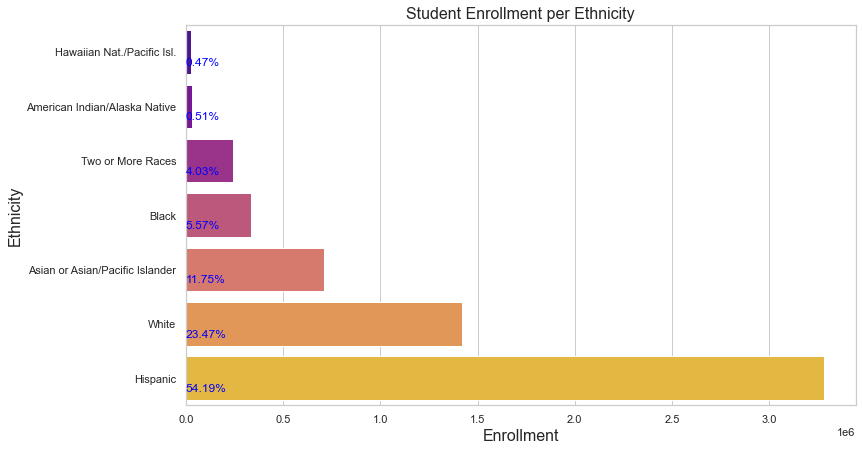

In [11]:
y= list(pivot_df['Percent'])

#Seaborn Horizontal barplot
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(12,7))
ax = sns.barplot(x="Total Enrollment", y='Ethnicity', data=pivot_df, ci=None ,orient='h', palette="plasma" )
ax.set_title("Student Enrollment per Ethnicity",  fontsize = 16)
ax.set_xlabel ("Enrollment",  fontsize = 16)
ax.set_ylabel ("Ethnicity",  fontsize = 16)

for i, v in enumerate(pivot_df['Percent']):
    ax.text(v, i + .25,"%.2f%%"%(v), color='blue')
bar.savefig("Seaborn_Bar_Vertical.png");

### Mean Scale Scores distribution

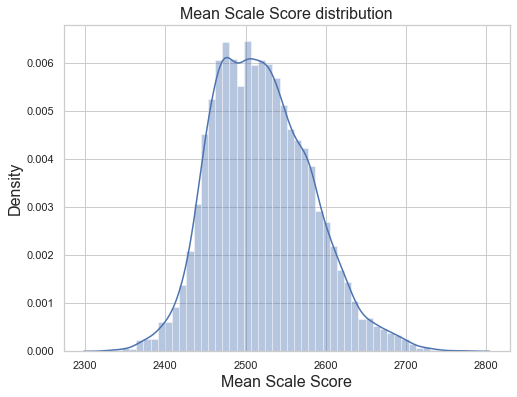

In [12]:
plt.figure(figsize=(8,6))
sns.distplot(assDF['Mean Scale Score'])
plt.title('Mean Scale Score distribution',  fontsize = 16)

# Adding labels
_ = plt.xlabel('Mean Scale Score', fontsize=16)
_ = plt.ylabel('Density', fontsize=16)

plt.show()

## Boxplot per ethnicity: 
1. Percetange of Pass
2. Mean Scale Score

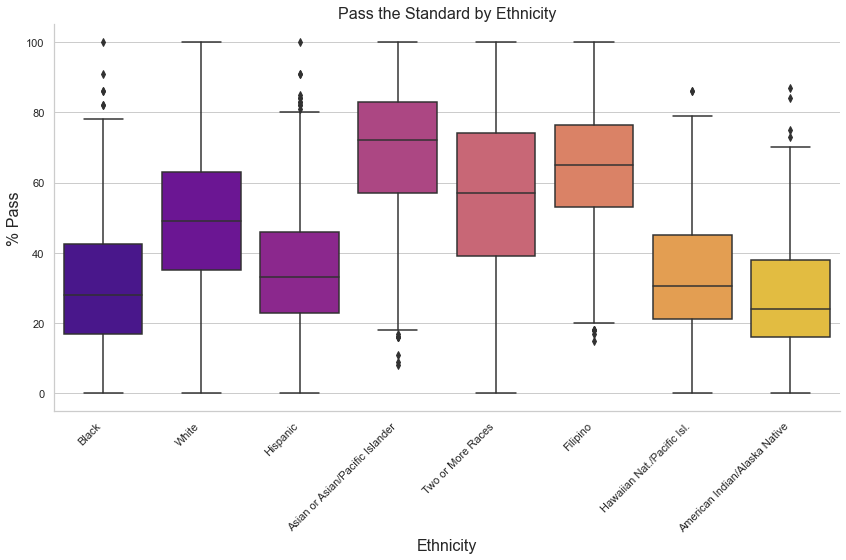

In [13]:
sns.catplot(x="Subgroup ID", y="Pass", kind="box", data=assDF, palette="plasma", height=6, aspect=2)

plt.xticks(rotation=45, ha='right')
_= plt.title('Pass the Standard by Ethnicity', fontsize = 16)

# Adding labels
_ = plt.xlabel('Ethnicity', fontsize=16)
_ = plt.ylabel('% Pass', fontsize=16)


plt.show()

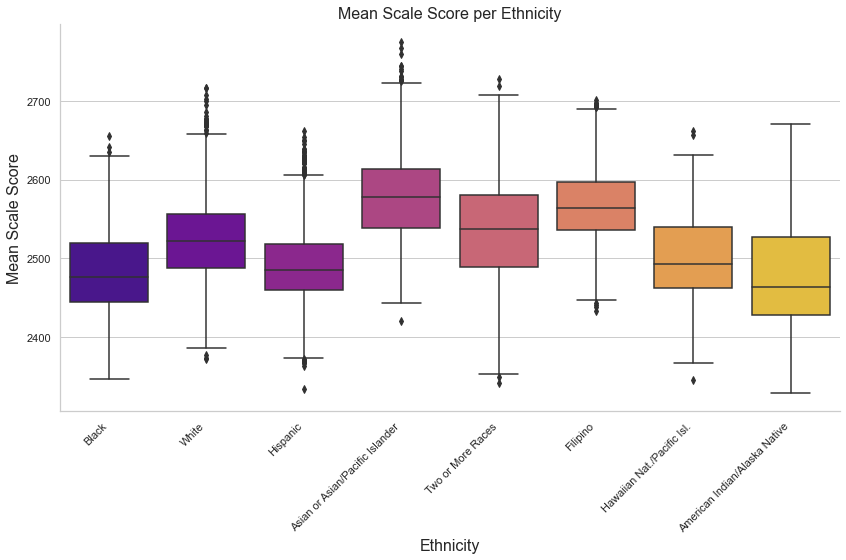

In [14]:
sns.catplot(x="Subgroup ID", y="Mean Scale Score", kind="box", data=assDF, palette="plasma", height=6, aspect=2)
plt.xticks(rotation=45, ha='right')
_= plt.title('Mean Scale Score per Ethnicity', fontsize = 16)

# Adding labels
_ = plt.xlabel('Ethnicity', fontsize=16)
_ = plt.ylabel('Mean Scale Score', fontsize=16)

In [15]:
## to understand if the difference we see is significative we performed a t ttest on the means of each ethnicity.
#pairwise_results = pairwise_ttests(dv="Mean Scale Score", between = ['Subgroup ID'], padjust='bonf', data=school_ass)
#pairwise_results

# Basic Analysis

## Scatter plot Total Revenue vs Total Enrollment 

- Because Los Angeles is such a large district, we will separate the datasate from los angeles for this basic graph.
- Make a dynamic graph to show:

    1. Entire Dataset
    2. Large districts without LA
    3. Rest of the districts

In [16]:
df.sort_values(by='Total Enrollment', ascending=False).head(5)

Unnamed: 0.1  District Code          Agency Name  \
493           499        64733.0  LOS ANGELES UNIFIED   
787           796        68338.0    SAN DIEGO UNIFIED   
488           494        64725.0   LONG BEACH UNIFIED   
292           297        62166.0       FRESNO UNIFIED   
243           248        67314.0    ELK GROVE UNIFIED   

     American Indian/Alaska Native    Black  Hispanic    White  \
493                         1226.0  52837.0  468734.0  63828.0   
787                          298.0  11087.0   59806.0  29347.0   
488                          152.0  10157.0   43148.0  10090.0   
292                          435.0   6224.0   49722.0   7298.0   
243                          397.0   7857.0   16487.0  12917.0   

     Hawaiian Nat./Pacific Isl.  Two or More Races  \
493                      1797.0             9767.0   
787                       572.0             9728.0   
488                      1152.0             3635.0   
292                       261.0             1321.0   
243                      1033.0             5643.0   

     Asian or Asian/Pacific Islander  Total Enrollment  Total Revenue  \
493                          35432.0          633621.0   8.441222e+09   
787                          17202.0          128040.0   9.299510e+08   
488                           8094.0           76428.0   9.148870e+08   
292                           8095.0           73356.0   9.304280e+08   
243                          18218.0           62552.0   6.430600e+08   

     Revenue per student  
493             13322.19  
787              7262.97  
488             11970.57  
292             12683.73  
243             10280.41

In [17]:
df_nonLosAngeles = df.drop(493, axis=0)
df_general_districts = df_nonLosAngeles[df_nonLosAngeles['Total Enrollment'] < 10000]
df_large_districts = df_nonLosAngeles[df_nonLosAngeles['Total Enrollment'] > 10000]

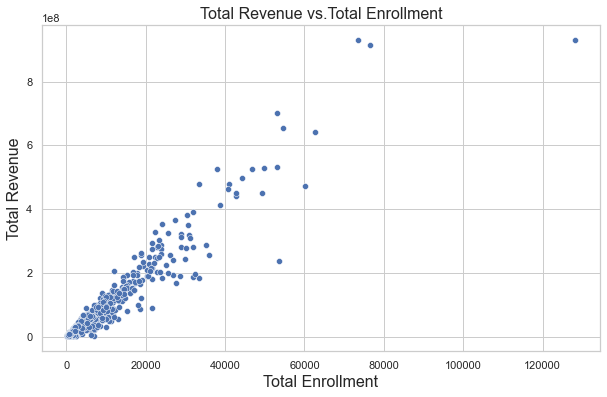

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Total Enrollment', y='Total Revenue',data=df_nonLosAngeles, palette="plasma")
plt.title('Total Revenue vs.Total Enrollment', fontsize = 16)

# Adding labels
_ = plt.xlabel('Total Enrollment', fontsize=16)
_ = plt.ylabel('Total Revenue', fontsize=16)

plt.show()

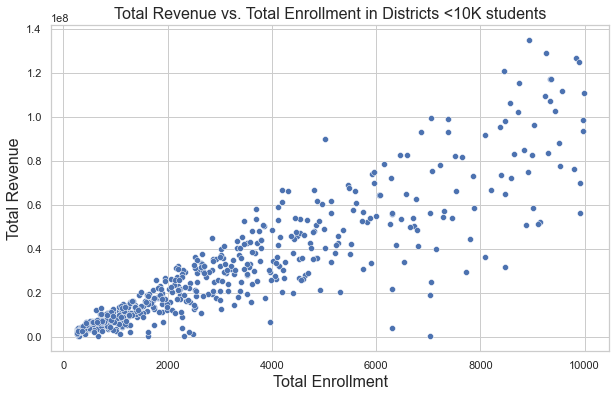

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Total Enrollment', y='Total Revenue',data=df_general_districts, palette="plasma")
plt.title('Total Revenue vs. Total Enrollment in Districts <10K students', fontsize = 16)

# Adding labels
_ = plt.xlabel('Total Enrollment', fontsize=16)
_ = plt.ylabel('Total Revenue', fontsize=16)

plt.show()

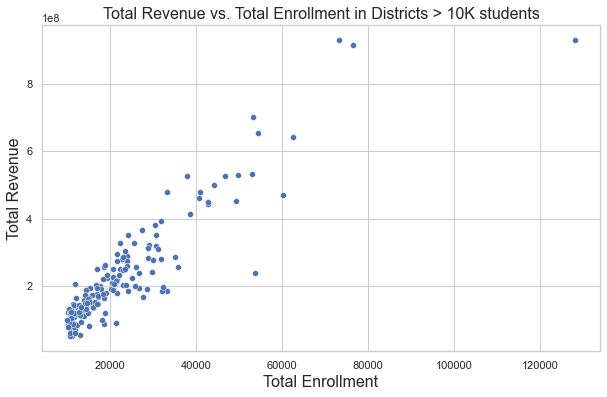

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Total Enrollment', y='Total Revenue',data=df_large_districts, palette="plasma")
plt.title('Total Revenue vs. Total Enrollment in Districts > 10K students', fontsize=16)

# Adding labels
_ = plt.xlabel('Total Enrollment', fontsize=16)
_ = plt.ylabel('Total Revenue', fontsize=16)

plt.show()

## Revenue per student vs. Total Enrollment

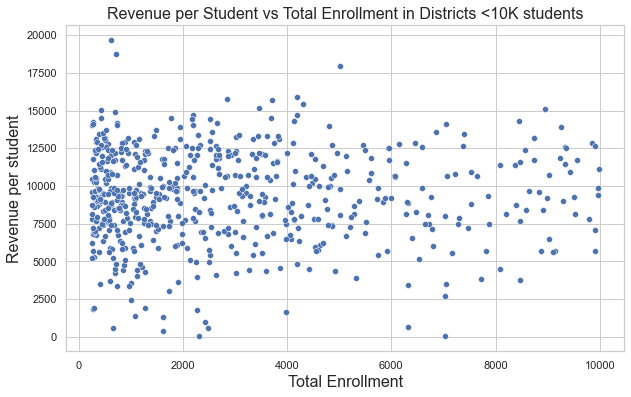

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Total Enrollment', y='Revenue per student',data = df_general_districts, palette="plasma")
plt.title('Revenue per Student vs Total Enrollment in Districts <10K students', fontsize = 16)

# Adding labels
_ = plt.xlabel('Total Enrollment', fontsize=16)
_ = plt.ylabel('Revenue per student', fontsize=16)

plt.show()

## Observation
- Revenue per student seems to be independent of total enrollment

# Mean scale score for English literacy and math per ethnicity 

<Figure size 1008x432 with 0 Axes>

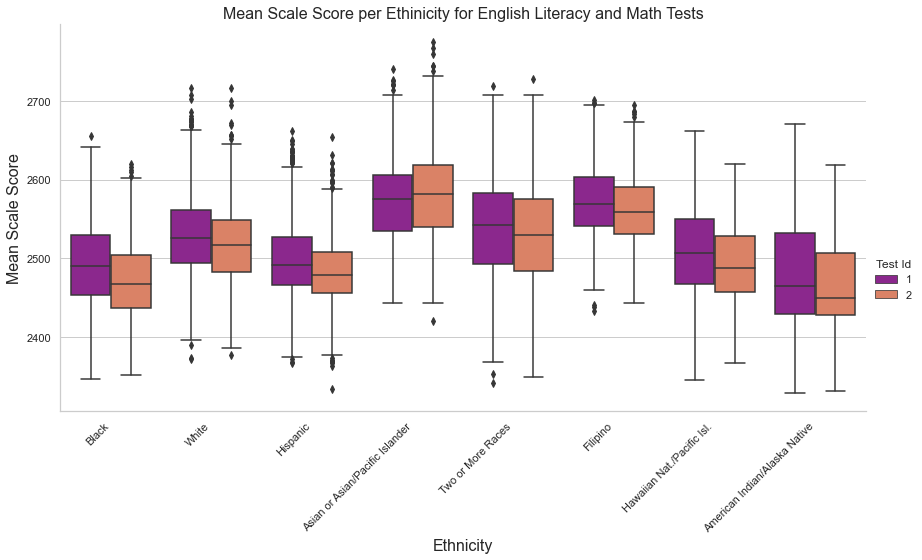

In [22]:
plt.figure(figsize=(14,6))
sns.catplot(x="Subgroup ID", y="Mean Scale Score", hue="Test Id", 
            kind="box", data=assDF, palette="plasma", height=6, aspect=2)
plt.xticks(rotation=45, ha='right')
_=plt.title('Mean Scale Score per Ethinicity for English Literacy and Math Tests', fontsize = 16)

# Adding labels
_ = plt.xlabel('Ethnicity', fontsize=16)
_ = plt.ylabel('Mean Scale Score', fontsize=16)

## Observation
- There is a wide range of values for all ethnicities
- On average it seems that students of Black, American Indian/Alaska Native and Hispanic ethnicity underperform students of Asian/Pacific Islander and Filipino ethnicity
- Students of Asian/Pacific Islander ethinicity perform better on average in math than English literacy
- All other ethinicities perform better on average in English literacy than in math

------------

## Scatterplot Mean Scale Scores vs. Revenue per student

# Does revenue per student impact students' outcome?

In [23]:
# update the main dataset to not include outliers
df_new = df2[(df2['Revenue per student'] < 17498)]
df_new = df_new[(df_new['Revenue per student'] >= 8942.5)]

#print(df_high_funding.shape)
#print(df_new.shape)

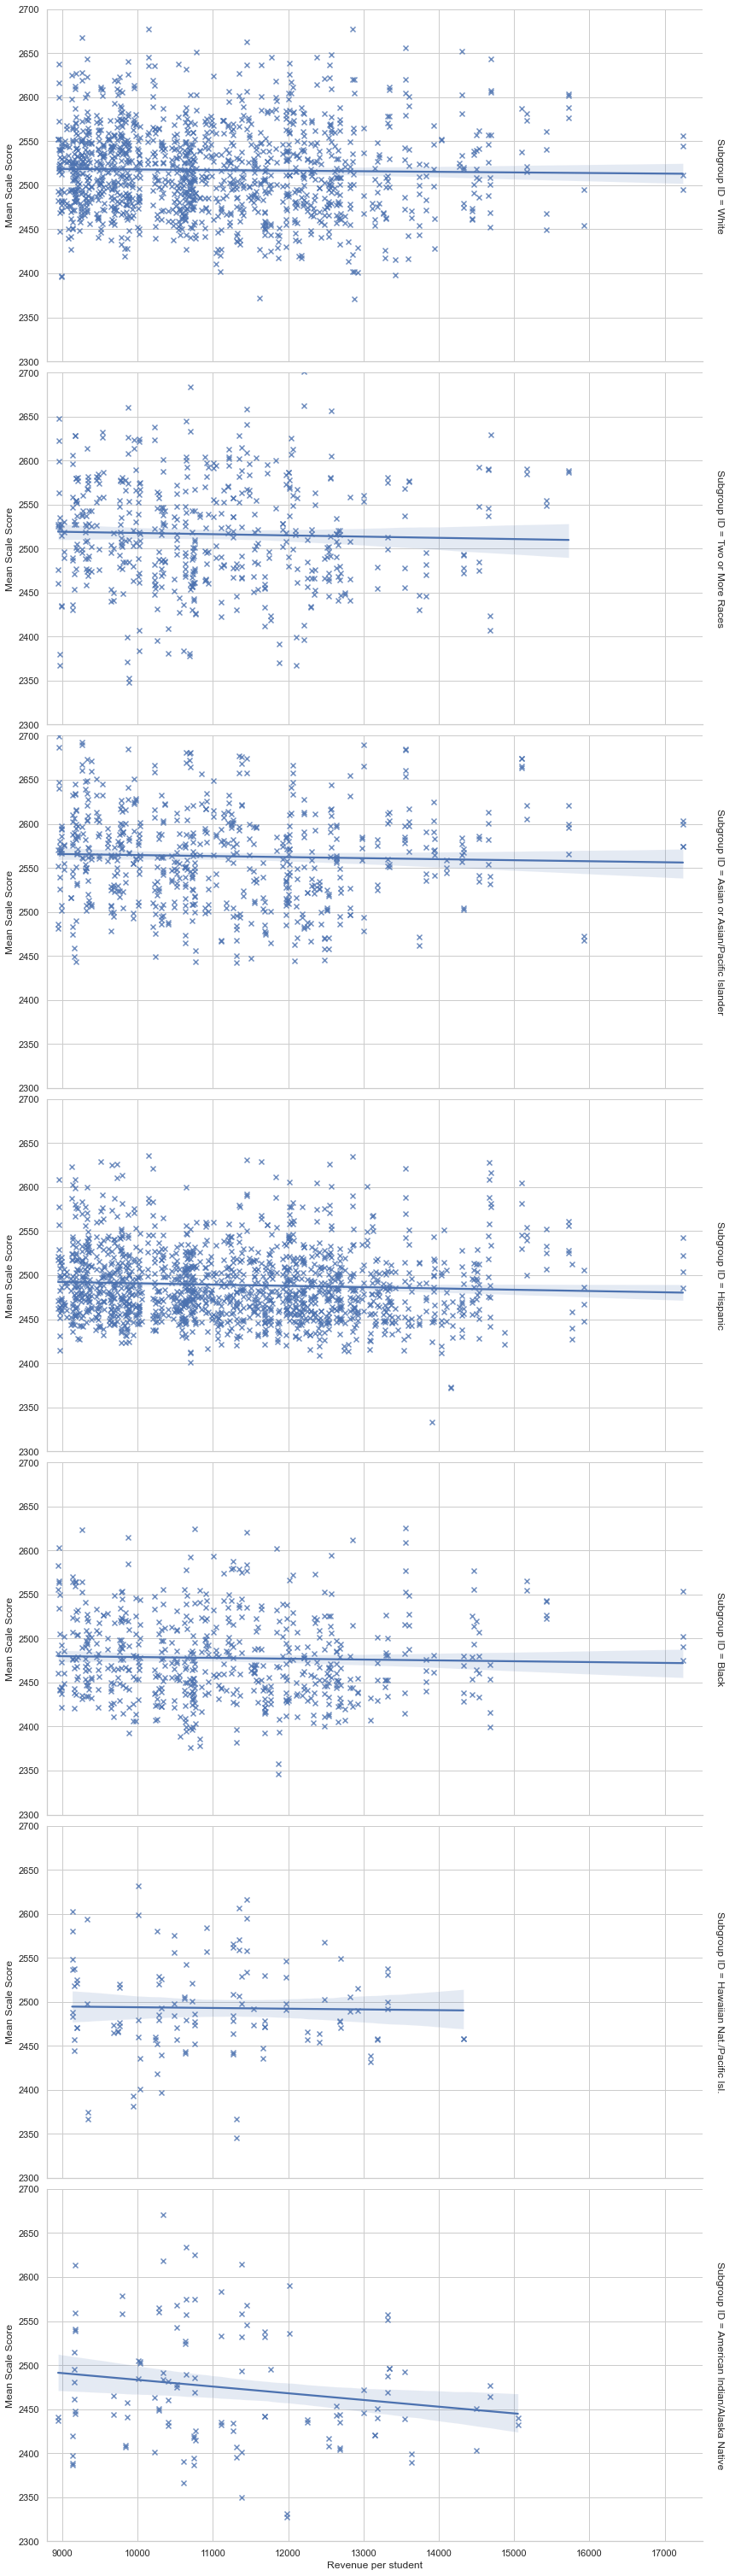

In [24]:
g = sns.FacetGrid(df_new, row='Subgroup ID', #hue="Disadvantaged", 
                  margin_titles=True, height=6, aspect=2, palette="plasma")

g.map(sns.regplot,'Revenue per student', 'Mean Scale Score',marker="x")

_=g.set(xlim=(8800, 17500), 
 ylim=(2300, 2700))
_=g.add_legend()

## Observation
- Based on these scatter plots it doesn't seem like revenue per student has a meaningful impact on students' mean scale score for any ethnicity
- There's a weak downward slope line between mean scale score and revenue per student for American Indian/Alaska native, indicative of a weak negative relationship
- For all other ethinicites the line seems somewhat flat, indicative of no relationship


--------

# Correlation tables

In [25]:
corr_cols=['District Code', 'Agency Name', 'Total Revenue',
       'Total Enrollment',
       'County Code', 'Test Id',
       'Total Tested At Entity Level', 'Total Tested with Scores',
       'CAASPP Reported Enrollment', 'Students Tested', 'Students with Scores',
       'Total Standard Exceeded', 'Total Standard Met',
       'Total Standard Met and Above', 'Total Standard Nearly Met',
       'Total Standard Not Met', 'Percentate Std Exceed', 'Percentage Std Met',
       'Percentage Std Nearly Met', 'Percentage Std Not Met',
       'Percentage Std Met and Above']
df_corr= df_new.drop(columns= corr_cols)
corr=df_corr.corr()
corr.style.background_gradient(cmap='YlGnBu')

## Observation

- After observing the scatter plots Mean Scale Score vs. Revenue per Studeny per ethnicity, we expected to see weak or no relationship between these two variables
- The correlation table shows no relationship between revenue per student and mean scale score
- Revenue per student vs. Mean Scale Score: corr = -0.057693



**This was a surprising result!** Prior to starting this investigation we expected to see a positive correlation between revenue per student and students' outcome. This led us into further investigation to understand what variables are most correlated with students' test scores.

-------------

### Pearson correlation between revenue per student and mean scale score

In [26]:
import numpy as np
from scipy import stats

def pearsonr_ci(x,y,alpha=0.05):
    ''' calculate Pearson correlation along with the confidence interval using scipy and numpy
    Parameters
    ----------
    x, y : iterable object such as a list or np.array
      Input for correlation calculation
    alpha : float
      Significance level. 0.05 by default
    Returns
    -------
    r : float
      Pearson's correlation coefficient
    pval : float
      The corresponding p value
    lo, hi : float
      The lower and upper bound of confidence intervals
    '''

    r, p = stats.pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(x.size-3)
    z = stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    return r, p, lo, hi

In [27]:
r,p,lo,hi=pearsonr_ci(df_new['Revenue per student'],df_new['Mean Scale Score'])
print('The correlation coefficient is value is',r)
print('The P for 95% is ', p)
print('The lower point of the confident interval is', lo)
print('The higher point of the confidence interval is', hi)

The correlation coefficient is value is -0.057692503581379034
The P for 95% is  6.498931389864927e-05
The lower point of the confident interval is -0.08588146850891472
The higher point of the confidence interval is -0.02941124428976604


-------------

# In Depth EDA

# Further analysis at district level data

### Disadvantaged Category

-  Added Disadvantaged category to the dataset (regarding students' economic background)
    1. Disadvantaged
    2. Not disadvantaged
    
    
- Adding the best fit line to scatter plots

In [28]:
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.4f} + {:.4f}x'.format(a, b))

    return a, b

In [29]:
x=df_new['Revenue per student']
y=df_new['Mean Scale Score']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print('Slope: ',slope)
print('Intercept: ', intercept)
print('R-Value: ',r_value)
print('Standard Error: ', std_err)
print('P value: ', p_value)

Slope:  -0.0020495142006661457
Intercept:  2530.4201691214776
R-Value:  -0.05769250358137906
Standard Error:  0.0005127038884807237
P value:  6.498931389879107e-05


## Scatter plots
1. Mean Scale Score
2. Percetange of students who Pass

best fit line:
y = 2530.4202 + -0.0020x


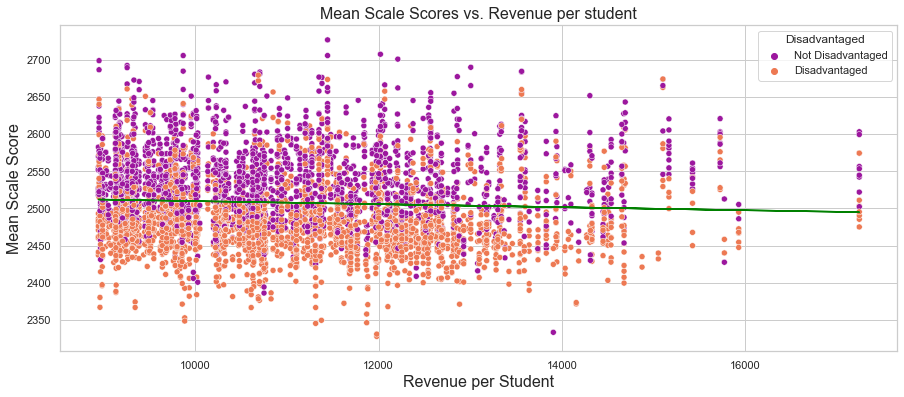

In [30]:
a, b = best_fit(df_new['Revenue per student'],df_new['Mean Scale Score'])
plt.figure(figsize=(15,6))
sns.scatterplot(df_new['Revenue per student'],df_new['Mean Scale Score'],hue=df_new['Disadvantaged'], palette='plasma')
yfit = [a + b * xi for xi in df_new['Revenue per student']]
plt.plot(df_new['Revenue per student'], yfit,color='green')
plt.title('Mean Scale Scores vs. Revenue per student', fontsize=16)
plt.xlabel('Revenue per Student', fontsize=16)
_=plt.ylabel('Mean Scale Score', fontsize=16)

## Observation
- Mean Scale Score vs Revenue per Student by disadvantaged category
- The best fit line is almost flat indicating no noticeable relationship between the variables
- There's an evident difference between the mean scale score for the disadvantaged category
- Students in the disadvantaged category seems to clearly score lower than students in the not disadvantaged category


Text(0, 0.5, '% Pass')

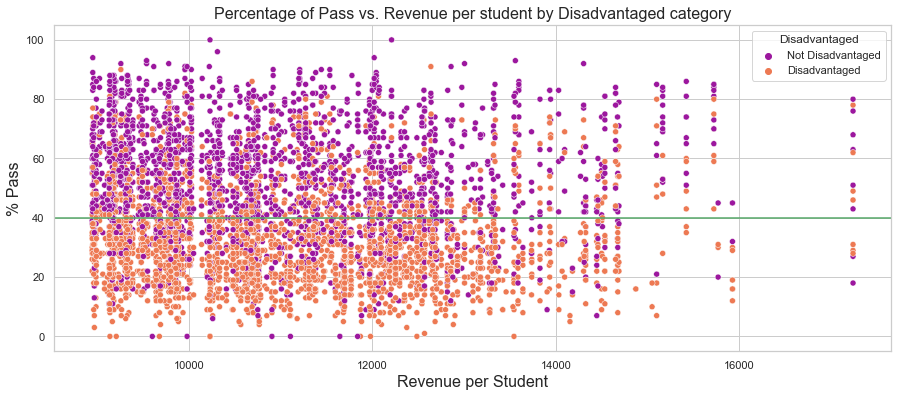

In [31]:
plt.figure(figsize=(15,6))
sns.scatterplot(df_new['Revenue per student'],df_new['Pass'],hue=df_new['Disadvantaged'], palette='plasma')
plt.axhline(y=40, color='g', linestyle='-')
plt.title('Percentage of Pass vs. Revenue per student by Disadvantaged category', fontsize=16)
plt.xlabel('Revenue per Student', fontsize=16)
plt.ylabel('% Pass', fontsize=16)

## Observation
- Percentage of students who pass the standard vs revenue per student by disadvantaged category
- A higher percentage of not disadvantaged students pass the standards
- A lower percentage of disadvantaged students pass the standards
- Consequently, a higher percentage of disadvantaged students fail the standards

## Boxplot
1. Mean scale score per disadvantaged category
2. Mean scale score per ethnicity and disadvantaged category

<Figure size 864x576 with 0 Axes>

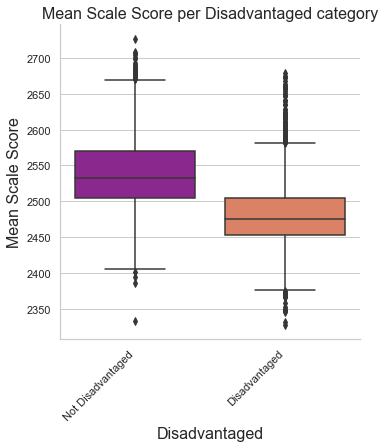

In [32]:
plt.figure(figsize=(12,8))
sns.catplot(x="Disadvantaged", y="Mean Scale Score", #hue="Disadvantaged", 
            kind="box", data=df_new, palette="plasma")

plt.xticks(rotation=45, ha='right')

_ = plt.title('Mean Scale Score per Disadvantaged category', fontsize = 16)
_ = plt.xlabel('Disadvantaged', fontsize=16)
_ = plt.ylabel('Mean Scale Score', fontsize=16)

In [33]:
dis=df_new[df_new.Disadvantaged=="Disadvantaged"]['Mean Scale Score']
no_dis=df_new[df_new.Disadvantaged=="Not Disadvantaged"]['Mean Scale Score']
statistic, pvalue = stats.ttest_ind(dis,no_dis, equal_var=False)
statistic, pvalue

(-39.44193370688662, 9.178725644172019e-293)

<Figure size 864x576 with 0 Axes>

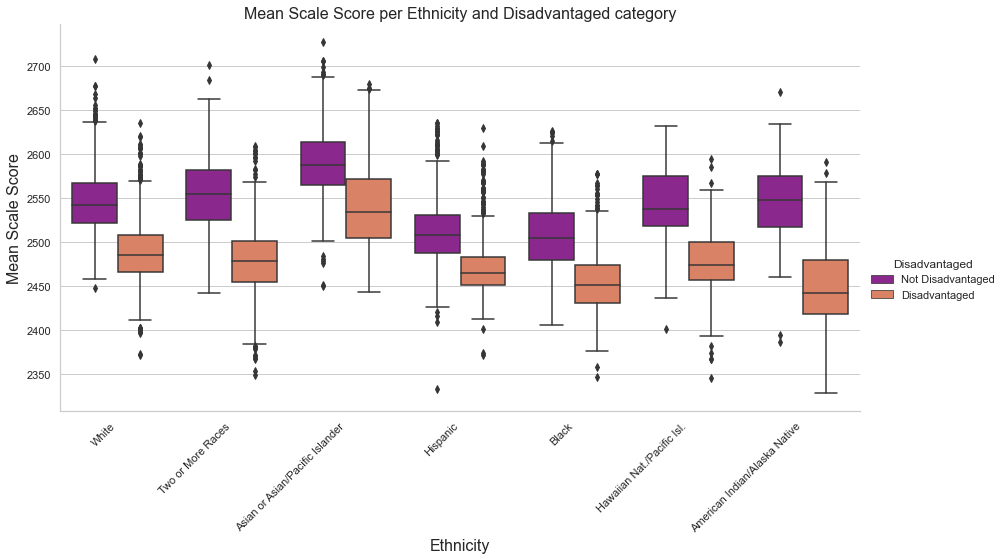

In [34]:
plt.figure(figsize=(12,8))
sns.catplot(x="Subgroup ID", y="Mean Scale Score", hue="Disadvantaged", 
            kind="box", data=df_new, palette="plasma", height=6, aspect=2)
plt.xticks(rotation=45, ha='right')
_ = plt.title('Mean Scale Score per Ethnicity and Disadvantaged category', fontsize=16)
_ = plt.xlabel('Ethnicity', fontsize=16)
_ = plt.ylabel('Mean Scale Score', fontsize=16)

# Scatter plot 
## % Pass vs Revenue per Student for each ethnicity with disadvantaged category 




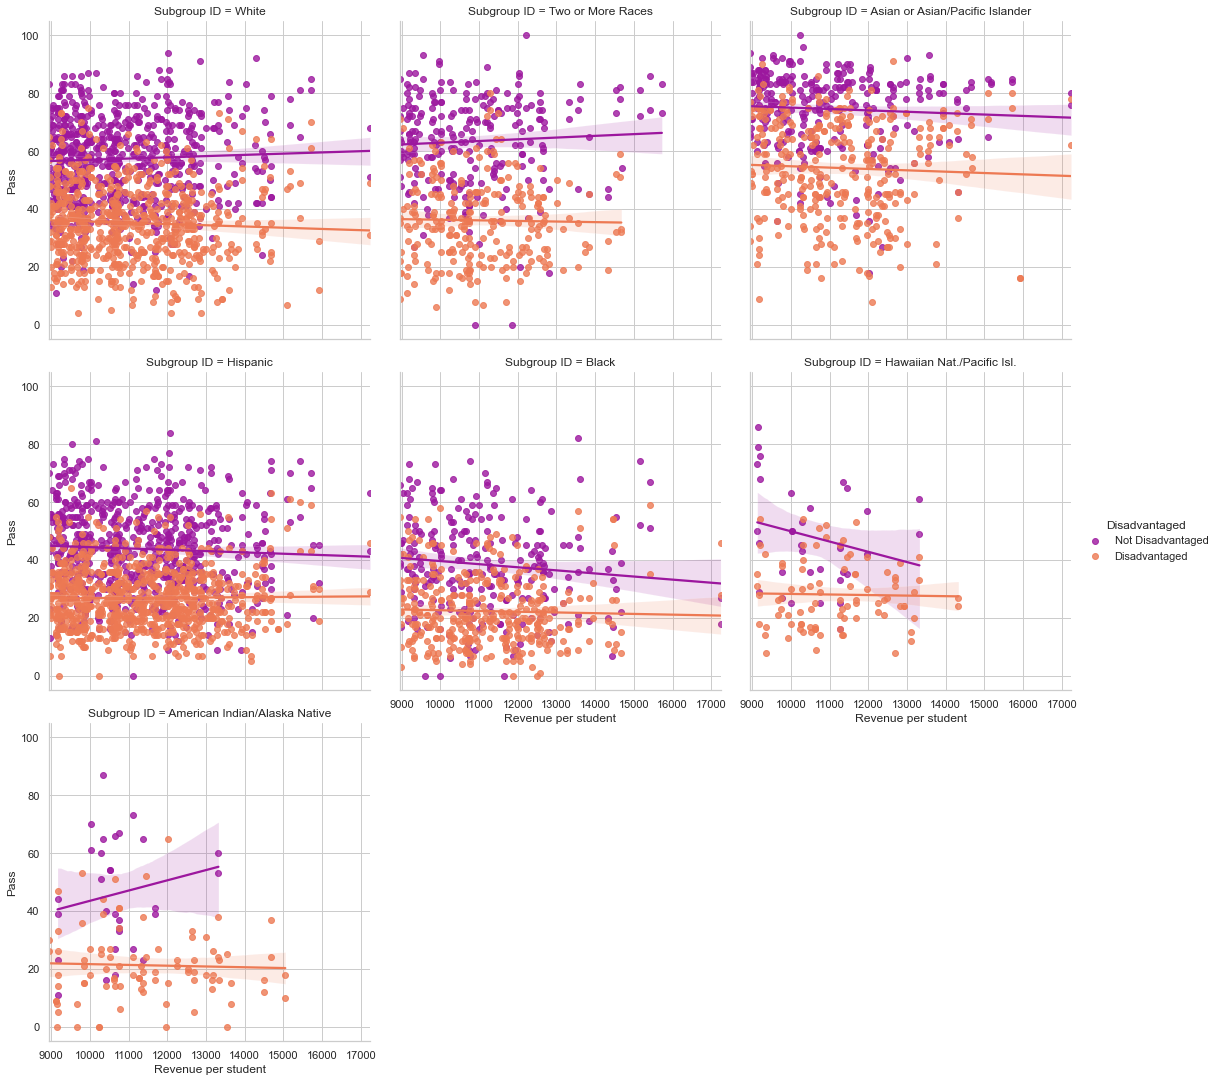

In [35]:
sns.lmplot(x="Revenue per student", y="Pass", hue="Disadvantaged", palette="plasma",
           col="Subgroup ID", #row="sex,"
           data=df_new,col_wrap=3, height=5);


## Observation
- Revenue per student seems to have a similar pattern of influence for both disadvantaged and not disadvantaged category for most of the ethnicities
- There's an opposite pattern per disadvantaged category for American Indian/Alaska Native, it's important to mention that the sample size for this ethnicity is relatively small compared to the others

### It was very clear that we had a large gap between disadvantaged and not disadvantaged students. Next we looked for patterns on the size of the district.

In [36]:
cut_labels = ['Smaller', 'Small', 'Medium', 'Large']
cut_bins = [0, 10000, 30000, 60000,130000]
df_new['district_enrollment'] = pd.cut(df_new['Total Enrollment'], bins=cut_bins, labels=cut_labels)

best fit line:
y = 2530.4202 + -0.0020x


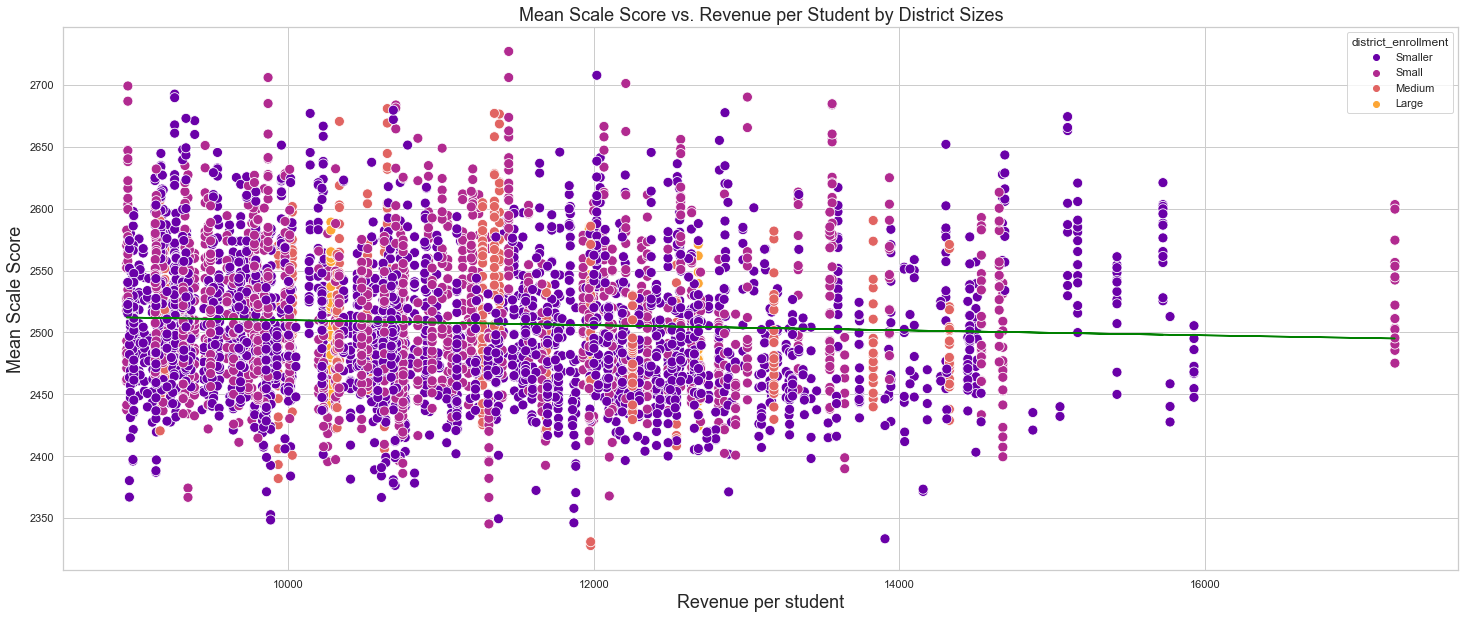

In [37]:
a, b = best_fit(df_new['Revenue per student'],df_new['Mean Scale Score'])
plt.figure(figsize=(25, 10))
sns.scatterplot(x='Revenue per student', y='Mean Scale Score', palette ='plasma',#hue='Disadvantaged',
                hue='district_enrollment', s=100,data=df_new)
yfit = [a + b * xi for xi in df_new['Revenue per student']]
#plt.xticks(np.arange(min(df['Revenue per student']),max(df['Revenue per student']+2000),step=1000.0), rotation=45)
plt.plot(df_new['Revenue per student'], yfit,color='green')
_ = plt.title('Mean Scale Score vs. Revenue per Student by District Sizes', fontsize=18)
_ = plt.xlabel('Revenue per student', fontsize=18)
_ = plt.ylabel('Mean Scale Score', fontsize=18)
plt.show()

# EDA - School level

### After more investigation and research, we decided to look at the assessment data at the school level instead of the district level. Also, we looked to evaluate where the money was spent and how that could impact scores as well. We looked for other factors, like Teacher-Student Ratio and FTE Teachers.

In [38]:
school_ass = pd.read_csv('dashboard_schools_ass.csv') 
#This file already has outliers removed

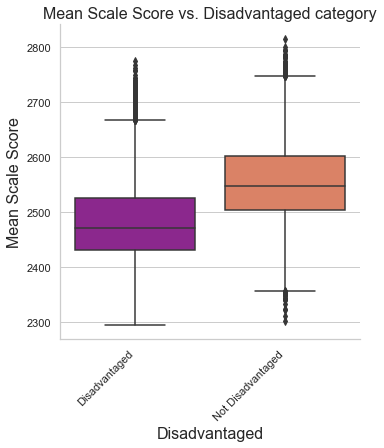

In [39]:
sns.catplot(x="Disadvantaged", y="Mean Scale Score", #hue="Disadvantaged", 
            kind="box", data=school_ass, palette="plasma")
plt.xticks(rotation=45, ha='right')
_ = plt.title('Mean Scale Score vs. Disadvantaged category', fontsize=16)
_ = plt.xlabel('Disadvantaged', fontsize=16)
_ = plt.ylabel('Mean Scale Score', fontsize=16)

## Observation
- On average students of disadvantaged background underpeform students of not disadvantaged background

In [40]:
school_df = pd.read_csv('dashboard_school_df_w_outliers.csv', index_col=0)
#school_df.columns

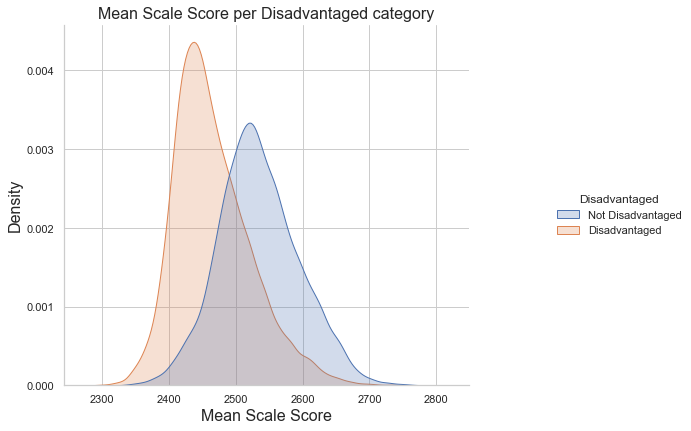

In [41]:
_ = sns.displot(school_df, x='Mean Scale Score', hue='Disadvantaged', kind="kde", fill=True)
_.fig.set_size_inches(10,6)
_ = plt.title("Mean Scale Score per Disadvantaged category", fontsize=16)
_ = plt.xlabel('Mean Scale Score', fontsize=16)
_ = plt.ylabel('Density', fontsize=16)

## Observation
- Distribution plot of mean scale score per disadvantaged category

In [42]:
dis=school_ass[school_ass.Disadvantaged=="Disadvantaged"]['Mean Scale Score']
no_dis=school_ass[school_ass.Disadvantaged=="Not Disadvantaged"]['Mean Scale Score']
statistic, pvalue = stats.ttest_ind(dis,no_dis, equal_var=False)
statistic, pvalue

(-115.42452785198951, 0.0)

## Correlation Table for School DataFrame
### ??? Toggle between these two tables in dashboard, please keep color code since is the same as the graphs, also try to not make it so big that you have to scroll the screen to the right.


- I had already changed the color of the tables when I saw this.
- I find the blue tones more pleasant to the eyes and easier to read. It makes a good contrast of colors with the graphs being on pink/purple tones :) 

### ??? Title for this correlation table "Correlation between revenue and students scores"

- What about "Correlation for types of revenue, pupil/teacher ratio, full-time equivalent teacher and forms of students' outcome" -- something like that -- mentioning the most important variables

In [43]:
#Correlaiton of revenue sources Vs Scores and Pass Fail
corr_columns = ['School Name', 'District Name', 'District Code_x',
       'Total Current Expenditures - Instruction (TCURINST) per Pupil ',
       'Total Current Expenditures - Support Services (TCURSSVC) per Pupil ',
       'Total Current Expenditures - Other El-Sec Programs (TCUROTH) per Pupil',
       'Total Current Expenditures - Salary (Z32) per Pupil ',
       'Total Current Expenditures - Benefits (Z34) per Pupil ',
       'Total Expenditures (TOTALEXP) per Pupil ',
       'Total Expenditures - Capital Outlay (TCAPOUT) per Pupil ',
       'Total Current Expenditures - Non El-Sec Programs (TNONELSE) per Pupil',
       'Total Current Expenditures (TCURELSC) per Pupil',
       'Instructional Expenditures (E13) per Pupil ', 'Subgroup ID','County Code', 'District Code_y',
       'School Code', 'Test Id',
       'Total Tested At Entity Level', 'Total Tested with Scores',
       'CAASPP Reported Enrollment', 'Students Tested', 'Students with Scores',
       'Total Standard Exceeded', 'Total Standard Met',
       'Total Standard Met and Above', 'Total Standard Nearly Met',
       'Total Standard Not Met', 'Disadvantaged', 'Zip Code','Percentate Std Exceed', 'Percentage Std Met',
       'Percentage Std Nearly Met', 'Percentage Std Not Met',
       'Percentage Std Met and Above']
df_corr= school_df.drop(columns= corr_columns)
corr=df_corr.corr()
corr.style.background_gradient(cmap='YlGnBu')

### ??? Title for this correlation table "Correlation between expenses and students scores"

"Correlation for types of expense and forms of students' outcome"

In [44]:
#Correlation of expenditures with scores
corr_columns = ['School Name', 'District Name', 'District Code_x',#'Full-Time Equivalent (FTE) Teachers', 
                'Pupil/Teacher Ratio',
                'Total Revenue (TOTALREV) per Pupil ',
       'Total Revenue - Local Sources (TLOCREV) per Pupil ',
       'Total Revenue - State Sources (TSTREV) per Pupil',
       'Total Revenue - Federal Sources (TFEDREV) per Pupil ',
       'Total Expenditures (TOTALEXP) per Pupil ',
       'Total Expenditures - Capital Outlay (TCAPOUT) per Pupil ',
       'Total Current Expenditures - Non El-Sec Programs (TNONELSE) per Pupil',
       'Total Current Expenditures (TCURELSC) per Pupil',
       'Instructional Expenditures (E13) per Pupil ', 'Subgroup ID','County Code', 'District Code_y',
       'School Code', 'Test Id',
       'Total Tested At Entity Level', 'Total Tested with Scores',
       'CAASPP Reported Enrollment', 'Students Tested', 'Students with Scores',
       'Total Standard Exceeded', 'Total Standard Met',
       'Total Standard Met and Above', 'Total Standard Nearly Met',
       'Total Standard Not Met', 'Disadvantaged', 'Zip Code','Percentate Std Exceed', 'Percentage Std Met',
       'Percentage Std Nearly Met', 'Percentage Std Not Met',
       'Percentage Std Met and Above']
df_corr= school_df.drop(columns= corr_columns)
corr=df_corr.corr()
corr.style.background_gradient(cmap='YlGnBu')

In [45]:
#df_revenue=school_df[(school_df['Total Revenue (TOTALREV) per Pupil ']>=8000) & (school_df['Total Revenue (TOTALREV) per Pupil ']<12000)]
#a, b = best_fit(df_revenue['Total Revenue (TOTALREV) per Pupil '],df_revenue['Mean Scale Score'])
#plt.figure(figsize=(15,6))
#sns.scatterplot(df_revenue['Total Revenue (TOTALREV) per Pupil '],df_revenue['Mean Scale Score'],
#                hue=df_revenue['Disadvantaged'], palette='plasma')
#yfit = [a + b * xi for xi in df_revenue['Total Revenue (TOTALREV) per Pupil ']]
#plt.plot(df_revenue['Total Revenue (TOTALREV) per Pupil '], yfit,color='red')
#plt.title('Schools Schores Vs Revenue per pupil for California')
#plt.xlabel('Revenue per Student')
#_=plt.ylabel('Mean Scale Score')

### ??? Toggle between these two graphs.

## Revenue per pupil at the school level continues to show a null to negative correlation to Scores

best fit line:
y = 2574.1301 + -0.0057x


Text(0, 0.5, 'Mean Scale Score')

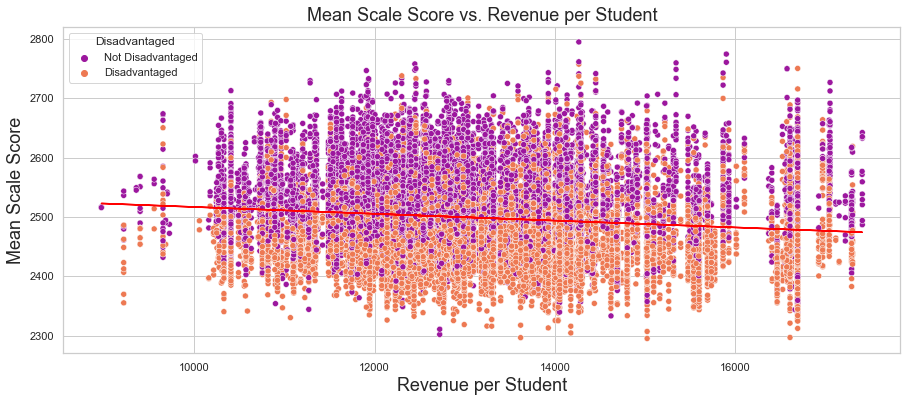

In [46]:
#df_revenue=school_df[school_df['Total Revenue (TOTALREV) per Pupil ']>12000]
a, b = best_fit(school_df['Total Revenue (TOTALREV) per Pupil '],school_df['Mean Scale Score'])
plt.figure(figsize=(15,6))
sns.scatterplot(school_df['Total Revenue (TOTALREV) per Pupil '],school_df['Mean Scale Score'],
                hue=school_df['Disadvantaged'], palette='plasma')
yfit = [a + b * xi for xi in school_df['Total Revenue (TOTALREV) per Pupil ']]
plt.plot(school_df['Total Revenue (TOTALREV) per Pupil '], yfit,color='red')
plt.title('Mean Scale Score vs. Revenue per Student', fontsize=18)
plt.xlabel('Revenue per Student', fontsize=18)
plt.ylabel('Mean Scale Score', fontsize=18)

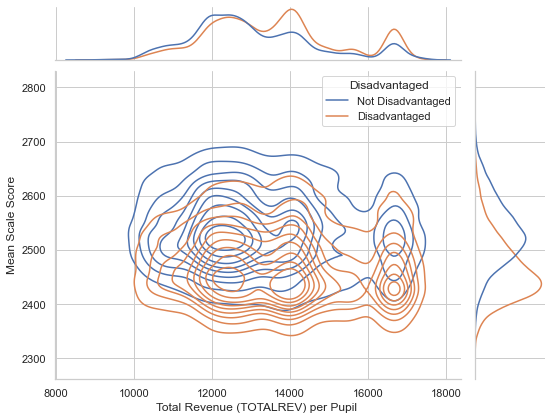

In [47]:
_ = sns.jointplot(x='Total Revenue (TOTALREV) per Pupil ', y='Mean Scale Score', hue='Disadvantaged', data=school_df, kind="kde")
_.fig.set_size_inches(8,6)


In [48]:
r,p,lo,hi=pearsonr_ci(school_df['Total Revenue (TOTALREV) per Pupil '],school_df['Mean Scale Score'])
print('The correlation coefficient is value is',r)
print('The P for 95% is ', p)
print('The lower point of the confident interval is', lo)
print('The higher point of the confidence interval is', hi)

The correlation coefficient is value is -0.13914253785014408
The P for 95% is  7.54613081836573e-141
The lower point of the confident interval is -0.1497626855610999
The higher point of the confidence interval is -0.12849028662642323


In [49]:
#df_revenue['Mean Scale Score'].describe()

In [50]:
#r,p,lo,hi=pearsonr_ci(df_revenue['Total Revenue (TOTALREV) per Pupil '],df_revenue['Mean Scale Score'])
#print('The correlation coefficient is value is',r)
#print('The P for 95% is ', p)
#print('The lower point of the confident interval is', lo)
#print('The higher point of the confidence interval is', hi)

## Looking at the slightly negative correlation between Revenue per student and Mean Scale Score. And also seeing a prevalence of low scores for Disadvantaged students. We wondered if schools with a majority of disadvantaged students might be getting higher revenue which would explain our initial findings.

# Economically Disadvantaged students are getting more revenue than Not disadvantaged Students

Text(-1.4789833333333249, 0.5, 'Density')

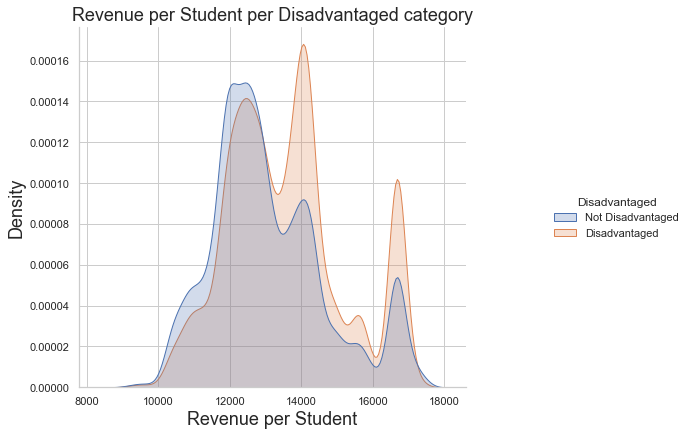

In [51]:
_ = sns.displot(school_df, x='Total Revenue (TOTALREV) per Pupil ', hue='Disadvantaged', kind="kde", fill=True)
_.fig.set_size_inches(10,6)
plt.title("Revenue per Student per Disadvantaged category", fontsize=18)
plt.xlabel('Revenue per Student', fontsize=18)
plt.ylabel('Density', fontsize=18)

Text(10.771016666666675, 0.5, 'Density')

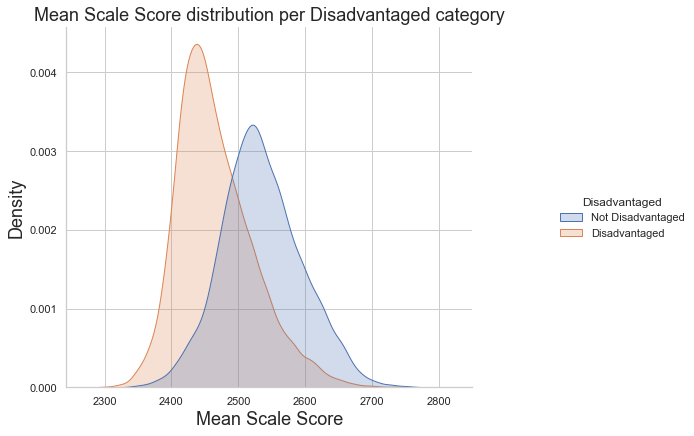

In [52]:
_ = sns.displot(school_df, x='Mean Scale Score', hue='Disadvantaged', kind="kde", fill=True)
_.fig.set_size_inches(10,6)
plt.title("Mean Scale Score distribution per Disadvantaged category", fontsize=18)
plt.xlabel('Mean Scale Score', fontsize=18)
plt.ylabel('Density', fontsize=18)

Text(10.590447222222231, 0.5, 'Density')

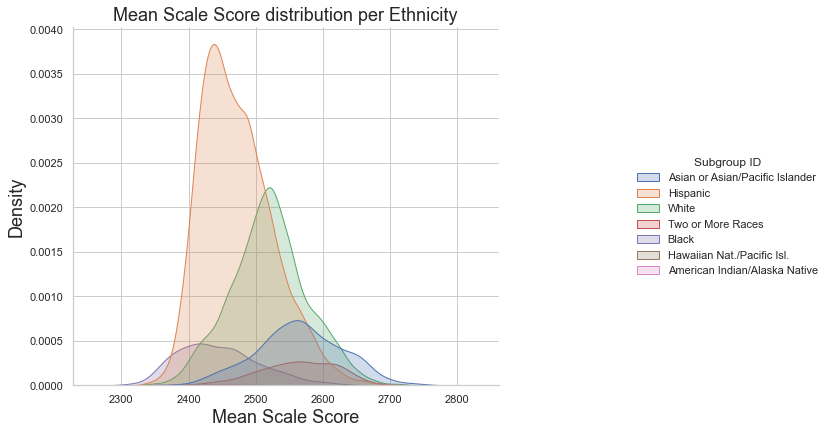

In [53]:
# comparative histogram
_ = sns.displot(school_df, x='Mean Scale Score', hue='Subgroup ID', kind="kde", fill=True)
_.fig.set_size_inches(12,6)
plt.xlabel("Mean Scale Score")
plt.ylabel("Density")
plt.title("Mean Scale Score distribution per Ethnicity", fontsize=18)
plt.xlabel('Mean Scale Score', fontsize=18)
plt.ylabel('Density', fontsize=18)

# What other factor's might be impacting student's scores?
### ??? Let's make this a different section than Schools EDA

## Compare scores with Total Enrollment of schools, on the correlation, there seems to be a positive correlation.

### ? Toggle between this two graphs in the dashboard

In [54]:
#school_df.columns

best fit line:
y = 2439.1588 + 0.0852x


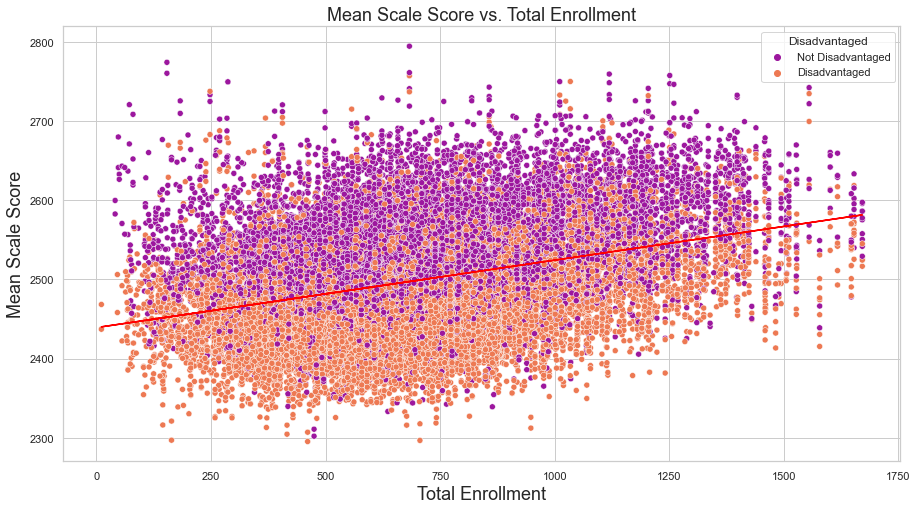

In [55]:
a, b = best_fit(school_df['Total Enrollment'],school_df['Mean Scale Score'])
plt.figure(figsize=(15,8))
sns.scatterplot(school_df['Total Enrollment'],school_df['Mean Scale Score'], hue=school_df['Disadvantaged'],palette='plasma')
yfit = [a + b * xi for xi in school_df['Total Enrollment']]
plt.plot(school_df['Total Enrollment'], yfit, color='red')
plt.title('Mean Scale Score vs. Total Enrollment', fontsize=18)
plt.xlabel('Total Enrollment', fontsize=18)
_=plt.ylabel('Mean Scale Score', fontsize=18)

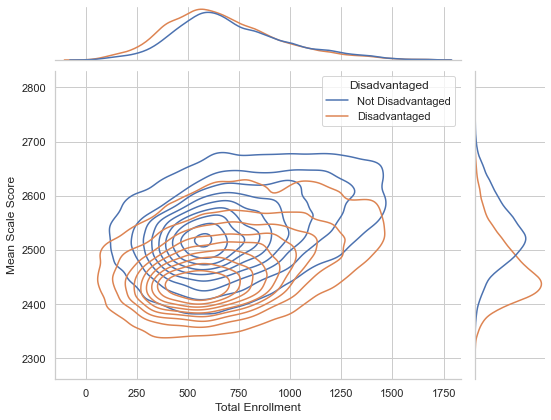

In [56]:
# jointplot
# An alternative graph to visualize the overlap of the distribution
_ = sns.jointplot(x='Total Enrollment', y='Mean Scale Score', hue='Disadvantaged', data=school_df, kind="kde")
_.fig.set_size_inches(8,6)

In [57]:
r,p,lo,hi=pearsonr_ci(school_df['Total Enrollment'],school_df['Mean Scale Score'])
print('Test Statistics between Total Enrollment and Mean Scale Scores')
print('The correlation coefficient is value is',r)
print('The P for 95% is ', p)
print('The lower point of the confident interval is', lo)
print('The higher point of the confidence interval is', hi)

Test Statistics between Total Enrollment and Mean Scale Scores
The correlation coefficient is value is 0.34000115488370813
The P for 95% is  0.0
The lower point of the confident interval is 0.3303733112970711
The higher point of the confidence interval is 0.34955825001299096


## FTE Teacher shows to have a positive impact in scores as well.

### ?? Toggle between these two graphs in dashboard

best fit line:
y = 2437.3193 + 2.1207x


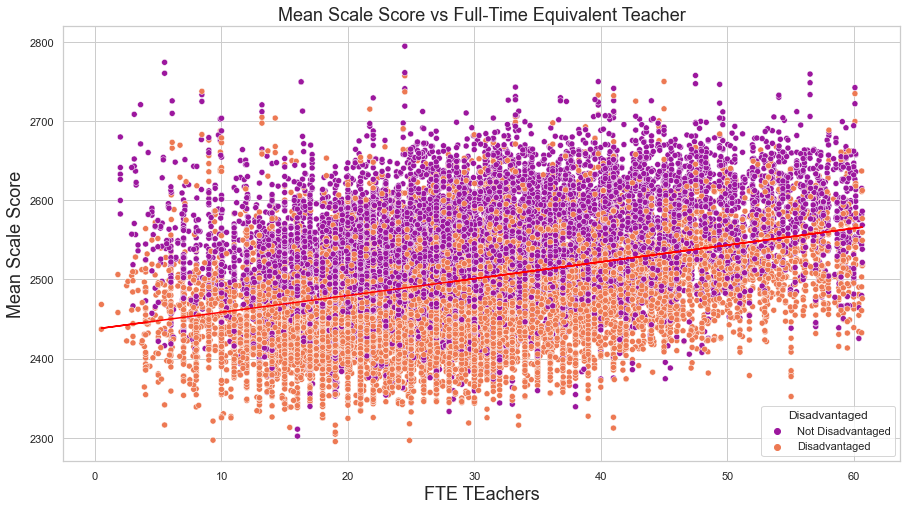

In [58]:
a, b = best_fit(school_df['Full-Time Equivalent (FTE) Teachers'],school_df['Mean Scale Score'])
plt.figure(figsize=(15,8))
sns.scatterplot('Full-Time Equivalent (FTE) Teachers','Mean Scale Score', hue='Disadvantaged',palette='plasma', data=school_df)
yfit = [a + b * xi for xi in school_df['Full-Time Equivalent (FTE) Teachers']]
plt.plot(school_df['Full-Time Equivalent (FTE) Teachers'], yfit, color='red')
plt.title('Mean Scale Score vs Full-Time Equivalent Teacher', fontsize=18)
plt.xlabel('FTE TEachers', fontsize=18)
_=plt.ylabel('Mean Scale Score', fontsize=18)

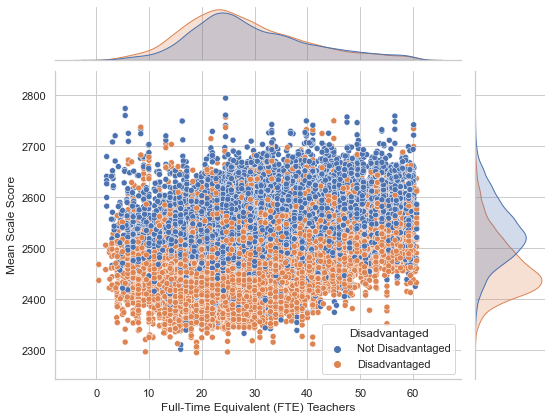

In [59]:
_ = sns.jointplot(x='Full-Time Equivalent (FTE) Teachers', y='Mean Scale Score', hue='Disadvantaged', data=school_df)
_.fig.set_size_inches(8,6)

In [ ]:
_ = sns.jointplot(x='Full-Time Equivalent (FTE) Teachers', y='Mean Scale Score', 
                  hue='Disadvantaged', data=school_df, kind="kde")
_.fig.set_size_inches(8,6)

In [ ]:
r,p,lo,hi=pearsonr_ci(school_df['Full-Time Equivalent (FTE) Teachers'],school_df['Mean Scale Score'])
print('The correlation coefficient is value is',r)
print('The P for 95% is ', p)
print('The lower point of the confident interval is', lo)
print('The higher point of the confidence interval is', hi)

### We see that the distribution of FTE teachers is not different based on the economic background of students. Rather is in function of enrollment of students, it is unclear why Revenue per Student shows a negative or non correlation to  FTE teachers.

### Statistics for FTE Teachers to Total revenue per pupil

In [ ]:
r,p,lo,hi=pearsonr_ci(school_df['Full-Time Equivalent (FTE) Teachers'],school_df['Total Revenue (TOTALREV) per Pupil '])
print('Test statistics for FTE Teachers and Revenue per Student')
print('The correlation coefficient is value is',r)
print('The P for 95% is ', p)
print('The lower point of the confident interval is', lo)
print('The higher point of the confidence interval is', hi)

### Statistics for FTE Teachers to Total Expenditures per pupil

In [ ]:
r,p,lo,hi=pearsonr_ci(school_df['Full-Time Equivalent (FTE) Teachers'],school_df['Total Expenditures (TOTALEXP) per Pupil '])
print('Test statistics for FTE Teachers and expenses per Student')
print('The correlation coefficient is value is',r)
print('The P for 95% is ', p)
print('The lower point of the confident interval is', lo)
print('The higher point of the confidence interval is', hi)

## Total Expenditures - Salary

In [ ]:
a, b = best_fit(school_df['Total Current Expenditures - Salary (Z32) per Pupil '],school_df['Mean Scale Score'])
plt.figure(figsize=(15,8))
sns.scatterplot(school_df['Total Current Expenditures - Salary (Z32) per Pupil '],school_df['Mean Scale Score'], hue=school_df['Disadvantaged'],palette='plasma')
yfit = [a + b * xi for xi in school_df['Total Current Expenditures - Salary (Z32) per Pupil ']]
plt.plot(school_df['Total Current Expenditures - Salary (Z32) per Pupil '], yfit, color='red')
plt.title('Mean Scale Score vs. Salary Expenditures per Disadvantaged category', fontsize=18)
plt.xlabel('Total Current Salary Expenditures', fontsize=18)
plt.ylabel('Mean Scale Score', fontsize=18)

In [ ]:
r,p,lo,hi=pearsonr_ci(school_df['Total Current Expenditures - Salary (Z32) per Pupil '],school_df['Mean Scale Score'])
print('The correlation coefficient is value is',r)
print('The P for 95% is ', p)
print('The lower point of the confident interval is', lo)
print('The higher point of the confidence interval is', hi)

# Observations per ethnicity - (this is another section on the dashboard too)

### Black and American Indian/Alaska Native students show the lowest mean scale scores.
### What is the distribution of disadvantaged students on these ethnicities, and are the different scores statistically significant?

In [ ]:
sns.catplot(x="Subgroup ID", y="Mean Scale Score", kind="box", data=school_df, palette="plasma", height=6, aspect=2)
plt.xticks(rotation=45, ha='right')
_ = plt.title('Mean Scale Score per Ethnicity', fontsize=18)
_ = plt.xlabel('Ethnicity', fontsize=18)
_ = plt.ylabel('Mean Scale Score', fontsize=18)

In [ ]:
#Don't show this table in the dashboard, only the final plot
cross=pd.crosstab(school_df['Subgroup ID'], school_df['Disadvantaged'])
cross

In [ ]:
#Don't show this table in the dashboard, only the final plot
dis_ethnicity_prop = round(cross.div(cross.sum(axis=1), axis=0)*100,2)
dis_ethnicity_prop

### American Indian/Alaska Natives, Black and Hawaiian Natives have a higher proportion of disadvantaged students. We didn't see this on our previous charts.

In [ ]:
plt_prop = dis_ethnicity_prop.plot(kind='bar', stacked = True, width = 1,colormap='PiYG')
plt_prop.legend(bbox_to_anchor=(1,1), loc='upper left', ncol = 1)

_ = plt.title('Cumulative Percentage', fontsize=18)
_ = plt.xlabel('Ethnicity', fontsize=18)
_ = plt.ylabel("%", fontsize=18)

In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
g, p, dof, expctd = chi2_contingency(cross)
print("p-value of Chi-square test for Disadvantage vs. Ethnicity =", p)

In [ ]:
def highlight_high_p(s):
    #Highlight the values where p corrected value is higher than .05
    is_high = s > 0.05
    return ['background-color:orange' if v else "" for v in is_high]

### We performed a pairwise ttest to see if the differences in mean scores for the different ethnicities were significantly different.
### Since Black, American Indian/Alaska Natives and Hispanics had the lowest scores but their populations are different. We also see that Hawaiian Nationals have a 100 percent disadvantage population with higher mean scores than the mentioned ethnnicities.

### The pairwise results tell us that the difference in mean between American Indian/Alaska Natives to Hawaiian Nationals, Blacks and Hispanics is not statistically significant. With these ethnicities having a high number of disadvantaged students.
### While Black studens do have a statistical difference to Hispanics which show different levels of not disadvantaged students.


In [ ]:
## to understand if the difference in Mean scale socores mean we see is significative we performed a t ttest on the means of each ethnicity.
pairwise_results = pairwise_ttests(dv="Mean Scale Score", between = ['Subgroup ID'], padjust='bonf', data=school_df)
pairwise_results
s=pairwise_results.style.apply(highlight_high_p, subset=['p-corr'])

In [ ]:
s

In [ ]:
#school_df.columns

# Conclusion:

## Our results show that coming from an economically disadvantaged background is a better predictor of students' outcome than schools' revenue.
## Disadvantaged students underperform not disadvantaged students on both outcome measures, that are mean scale score and passing the standards.
## Schools receive higher revenue per disadvantaged students. 
## Outside research points out to changes that have been made in California in order to provide more resources to disadvantaged students, this can be why we see none to negative correlation between revenue per student and mean scale score. 
## To understand the impact these changes have on disadvantaged students, we will require an evaluation through several years,  from the time the changes were implemented.  
## The next step would be the analysis of how this revenue has been spent, to see what kind of matter provides better outcomes. 
## On the small analysis we performed, Full-Time Elective Teachers had a positive correlation to scores, as well as "other Elementary-Secondary Education" expenses.